In [3]:
def SSWM(n,FF,M, beta, N,L=0):
    x=Init(n)
    #print x
    W=Fitness(x,FF)
    Timer=0
    MutCount=0
    MyTimer=[]
    MyMutCount=[]
    MaxFit=Fitness(numpy.array([1]*n),FF)
    while W<MaxFit:
        #print W
        xn=Mutation(x,M)
        Wn=Fitness(xn,FF)
        Timer+=1
        DeltaF=Wn-W
        Pfix=(1-numpy.exp(-2*beta*DeltaF))/(1-numpy.exp(-2*N*beta*DeltaF))
        if Pfix>random.random():
            x=list(xn)
            W=Wn
            MutCount+=1
            #print x
            #print W
            #print Timer
            MyTimer.append(Timer)
            MyMutCount.append(MutCount)
    MyTimer= numpy.array(MyTimer)
    MyMutCount= numpy.array(MyMutCount)
    return MyMutCount, MyTimer, Timer

    
def Mutation(x,M):
    xn=list(x)
    if M==1:
        a=random.randint(1,len(x))-1
        xn[a]=(xn[a]-1)%2
    if M==2: 
        print ('global mutations - not yet implemented')
    return xn

 
def Fitness(x,FF,L=0):
    if FF==1:
        W=sum(x)
        #print 'OneMax'
    if FF==2:
        W=0
        i=0
        if sum(x)==len(x):
            W=len(x)
            return W
        while (x[i]==1) & (W<len(x)):
                W+=1
                i+=1
    if FF==3:
        W=0
        i=0
        if sum(x)<L:
            W=sum(x)
        else:
            W=sum(x)-L+0.5
    return W
    
def Init(n):
    x=sum(numpy.random.randint(1, size=(1,n)))  #for init = all zeros
    #x=sum(numpy.random.randint(2, size=(1,n)))  #for random init, cca 50:50
    return x

   
def Runtime(n,m,FF, M, L=0,  beta =0.1, N=1000):
    T=[]
    Mut=0
    for i in range(m):
        (Mc,Tc, t)=SSWM(n,FF,M, beta, N,L)
        Mut=Mut+Mc
        T.append(t)
    #MyT=float(T)/m
    MyT=numpy.mean(T)
    MyTStd=numpy.std(T)
    #MyM=(Mut)/m
    #print ('Average runtime',MyT, 'iterations. Average number of mutations ', MyM) 
    #print ('expected runtime', MyT)
    return MyT, MyTStd

def Main():

    m=20 #repetitions
    t=100
    beta =0.1
    N=1000  #popuation size
    MyRT=[]
    MyRTSTD=[]
    Myn=[]
    FF=3  #which fitness landscape we are using: 1-onemax, 2 leading ones
    M=1    #which type of mutation we are using 1-local, 2 - global
    L=3

    for n in [10,20,30,40,60,100,200]:
        print ('running for n=', n)
        (RT, RTSTD)=Runtime(n, m, FF, M, L, beta, N)
        MyRT.append(RT)
        MyRTSTD.append(RTSTD)
        Myn.append(n)
     
    MyRT= numpy.array(MyRT)
    MyRTSTD= numpy.array(MyRTSTD)
    Myn= numpy.array(Myn)
    
    #print ('MyRT', MyRT)
    #print ('MyRTSTD', MyRTSTD)
    #print ('Myn', Myn)
    
    ouf = open("test_subor.txt", "w")
    ouf.write("MyRT\n")
    ouf.write(str( MyRT))
    ouf.write('\n')
    ouf.write('MyRTSTD\n')
    ouf.write(str( MyRTSTD))
    ouf.write('\n')
    ouf.write('Myn\n')
    ouf.write(str( Myn))
    ouf.write('\n')
    ouf.close()

    #plt.plot(Myn,MyRT,'b')
    #plt.plot(Myn,MyRT+MyRTSTD, 'g')
    #plt.plot(Myn,MyRT-MyRTSTD, 'g')
    
    #plt.show()
    
    
    print ('ended')

In [4]:
import random   
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Main()

running for n= 10
running for n= 20
running for n= 30
running for n= 40
running for n= 60
running for n= 100
running for n= 200
ended


[ 0.99  1.98  2.97  3.96  4.95  5.94  6.93  7.92  8.91  9.9  10.89 11.88
 12.87 13.86 14.85 15.84 16.83 17.82 18.81 19.8  20.79 21.78 22.77 23.76
 24.75 25.74 26.73 27.72 28.71 29.7  30.69 31.68 32.67 33.66 34.65 35.64
 36.63 37.62 38.61 39.6  40.59 41.58 42.57 43.56 44.55 45.54 46.53 47.52
 48.51 49.5  50.49 51.48 52.47 53.46 54.45 55.44 56.43 57.42 58.41 59.4
 60.39 61.38 62.37 63.36 64.35 65.34 66.33 67.32 68.31 69.3  70.29 71.28
 72.27 73.26 74.25 75.24 76.23 77.22 78.21 79.2  80.19 81.18 82.17 83.16
 84.15 85.14 86.13 87.12 88.11 89.1  90.09 91.08 92.07 93.06 94.05 95.04
 96.03 97.02 98.01 99.  ]
[   2.12    4.12    6.65    8.85   11.08   13.62   15.71   17.9    20.14
   22.58   25.1    27.35   29.75   32.07   34.98   37.98   40.73   43.3
   46.2    48.98   51.61   54.65   57.57   60.48   63.31   66.1    68.75
   71.68   74.66   77.89   80.83   84.37   87.46   90.59   94.12   97.91
  101.25  104.88  108.37  112.08  116.26  120.01  123.73  127.39  131.11
  134.92  139.21  143.64  1

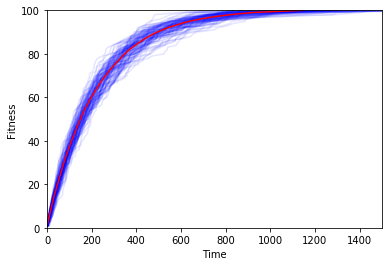

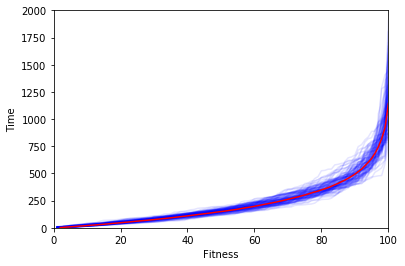

In [7]:
n=100
FF=1
M=1
beta=0.3
N=100
B=0
A=0
for i in range (1,100):
    [a,b, t]=SSWM(n,FF,M, beta, N,L=0)
    plt.figure(1)
    plt.plot(b,a, 'b', alpha=0.1)
    plt.figure(2)
    plt.plot(a,b, 'b', alpha=0.1)
    
    B=B+b
    A=A+a

MeanB=B/100
MeanA=A/100
print (MeanA)
print (MeanB)
plt.figure(1)
plt.axis([0, 1500, 0, 100])
plt.plot(MeanB,MeanA+1, 'r', alpha=1 )
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.savefig('Run.pdf', format='pdf', dpi=1000)
plt.show

plt.figure(2)
plt.axis([0, 100, 0, 2000])
plt.plot(MeanA+1,MeanB, 'r', alpha=1)
plt.ylabel('Time')
plt.xlabel('Fitness')
plt.savefig('RunTime.pdf', format='pdf', dpi=1000)
